In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import matplotlib.image as mpimg
import random
from matplotlib import patches

In [2]:
#Loading the training json file
open_json = open('training.json',)

In [3]:
data = json.load(open_json)#The dictionary keys are image and objects

In [4]:
data = pd.DataFrame(data)

In [5]:
data['category'] = [d[0].get('category') for d in data.objects] #Extracting the cell types

## Exploitory data analysis

In [6]:
image_directory = r'C:\Users\ghimi\Desktop\Malaria\images'
image_path = os.listdir(image_directory)

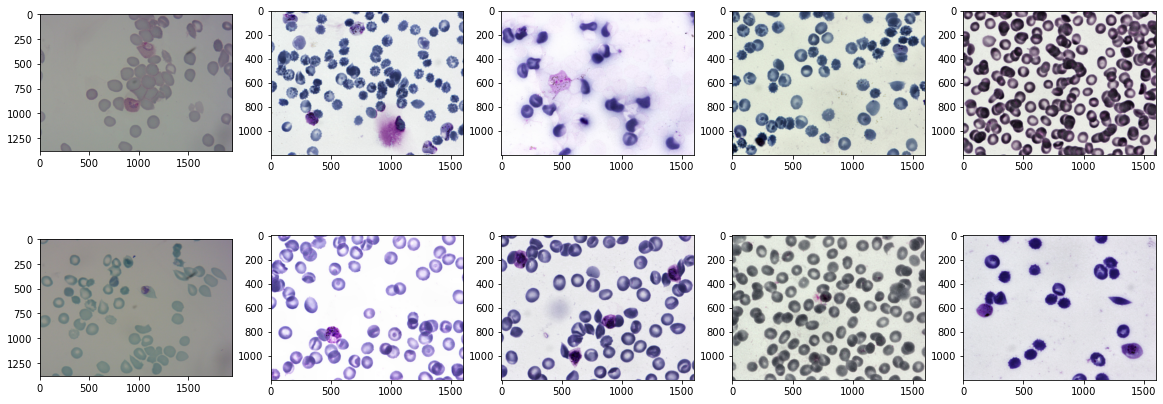

In [7]:
figure = plt.figure(figsize = (20,20))
cols = 5
rows = 5
for i in range(10):
    filepath = os.path.join(image_directory,random.choice(image_path))
    ax1 = figure.add_subplot(rows,cols,i+1)
    image = mpimg.imread(filepath)
    plt.imshow(image)
    
plt.show()

#### Exploring the data

In [8]:
#Let's see the different number of classes and value counts
data_counts = data['category'].value_counts()
print(data_counts)

red blood cell    1186
trophozoite          6
difficult            5
ring                 5
schizont             4
gametocyte           2
Name: category, dtype: int64


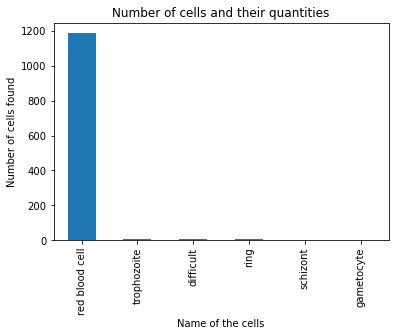

In [9]:
data_counts.plot(kind='bar')
plt.xlabel("Name of the cells") 
plt.ylabel("Number of cells found") 
plt.title("Number of cells and their quantities") 
plt.show() 

In [10]:
data.head()

,image,objects,category
0,{'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af...,"[{'bounding_box': {'minimum': {'r': 1057, 'c':...",red blood cell
1,{'checksum': '1225a18efce159eddf7b0e80e0ea642c...,"[{'bounding_box': {'minimum': {'r': 734, 'c': ...",red blood cell
2,{'checksum': '3eaf840523c30fdf38897ffa01e194eb...,"[{'bounding_box': {'minimum': {'r': 724, 'c': ...",red blood cell
3,{'checksum': '8a111dffacfa433029492780b9535091...,"[{'bounding_box': {'minimum': {'r': 563, 'c': ...",red blood cell
4,{'checksum': 'ccef403e971460b86444cca669e68ca1...,"[{'bounding_box': {'minimum': {'r': 618, 'c': ...",red blood cell


In [15]:
#Creating new coloumns by seperating the necessary data within the dataframes
data['checksum'] = data['image'].apply(lambda x: x['checksum']) #Creating a different coloumn for checksum
data['path'] = data['image'].apply(lambda x: x['pathname'][1:]) #Seperating the path for a different coloumn
data['shape'] = data['image'].apply(lambda x: x['shape']) #Extracting the shape of individual images in different coloumn
data['boundingbox'] = [d[0] for d in data.objects] #Seperating the bounding box coordinates

In [18]:
#Let us only keep the necessary coloumn for the data
final_dataframe = data[['shape','path','boundingbox','category','checksum']]

In [19]:
final_dataframe.head()

,shape,path,boundingbox,category,checksum
0,"{'r': 1200, 'c': 1600, 'channels': 3}",images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,"{'bounding_box': {'minimum': {'r': 1057, 'c': ...",red blood cell,676bb8e86fc2dbf05dd97d51a64ac0af
1,"{'r': 1200, 'c': 1600, 'channels': 3}",images/10be6380-cbbb-4886-8b9e-ff56b1710576.png,"{'bounding_box': {'minimum': {'r': 734, 'c': 7...",red blood cell,1225a18efce159eddf7b0e80e0ea642c
2,"{'r': 1200, 'c': 1600, 'channels': 3}",images/6b14c855-8561-417c-97a4-63fa552842fd.png,"{'bounding_box': {'minimum': {'r': 724, 'c': 1...",red blood cell,3eaf840523c30fdf38897ffa01e194eb
3,"{'r': 1200, 'c': 1600, 'channels': 3}",images/13099edb-35d9-438f-b093-2cf2ebf9d255.png,"{'bounding_box': {'minimum': {'r': 563, 'c': 1...",red blood cell,8a111dffacfa433029492780b9535091
4,"{'r': 1200, 'c': 1600, 'channels': 3}",images/2559636b-f01a-4414-93da-210c3b12d153.png,"{'bounding_box': {'minimum': {'r': 618, 'c': 6...",red blood cell,ccef403e971460b86444cca669e68ca1


#### Cell Visualisation